# TDA  with Python using the Gudhi Library  

# Confidence regions for persistence diagrams : data points  

In [1]:
import persistence_statistics as ps

import pandas as pd
import numpy as np
import pickle as pickle
import gudhi as gd  
import seaborn as sbs
from scipy.spatial import distance_matrix
from pylab import *

### Bottleneck Bootstrap 

In this tutorial, we introduce confidence regions for persistence diagrams built on a set of data points. See [this tutorial](Tuto-GUDHI-persistence-diagrams.ipynb) for an introduction to persistence diagrams.

<img src="Images/persistence.png"  style="width: 600px;"/>

For many applications of persistent homology, we observe topological features close to the diagonal. Since they correspond to topological structures that die very soon after they appear in the filtration, these points are generally considered as "topological noise". We will see that confidence regions for persistence diagram provide a rigorous framwork to this idea.

Confidence regions for persistence diagram provide a rigorous framework for selecting significant topological features in a persistence diagram. We use the bottleneck distance $d_b$ to define confidence regions. We see point clouds as random variables. Under this approach, persistence diagrams are also seen as random quantities.

The stability results often leads to conservative confidence sets. 

An alternative strategy is the bottleneck bootstrap introduced in [cmm-rcrgi-15](http://arxiv.org/abs/1412.7197).

We consider the general setting where a persistence diagram $\widehat{Dgm}$ is defined from the observation 
$(X_1, \ldots,  X_n)$ in a metric space. This persistence diagram corresponds to the estimation of an underlying persistence diagram $Dgm$, which can be related for instance to the support of the measure, or to the sublevel sets of a function related to this distribution (for instance a density function when the $X_i$'s are in $\mathbb R^d$). 

Let $(X_1^*,\dots,X_n^*)$ be a sample from the empirical measure defined from the observations $(X_1, \ldots,  X_n)$.

Let $\widehat{Dgm}^*$ be the persistence diagram derived from this sample. We then can take for the quantity  $\hat \eta_\alpha^*$ by

\begin{equation}
P( d_b ( \widehat{Dgm}^*, \hat  Dgm) > \hat \eta_\alpha \, |\, X_1,\ldots, X_n) = \alpha.
\end{equation}

Note that $\hat \eta_\alpha$ can be easily estimated with Monte Carlo procedures. 

The bottleneck bootstrap procedure has note been validated for all contexts. For instance, it has been shown in [cmm-rcrgi-15](http://arxiv.org/abs/1412.7197) that the bottleneck bootstrap is valid when computing the sublevel sets of a density estimator.

## Confidence regions for persistence diagrams for point cloud data in $\mathbb R^d$

We use a simulated dataset.

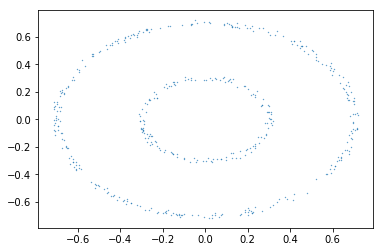

In [3]:
U1 = np.random.uniform(0,2 *  pi,size= 150)
V1 = np.array([[0.30 * cos(u) +0.02*np.random.uniform(-1,1) ,
                0.30 *sin(u)+0.02*np.random.uniform(-1,1)] for u in U1])
U2 = np.random.uniform(0,2 *  pi,size= 300)
V2 = np.array([[0.7* cos(u) +0.02*np.random.uniform(-1,1) ,
                0.7*sin(u)+0.02*np.random.uniform(-1,1)] for u in U2])
W = np.concatenate((V1,V2), axis=0)
plt.scatter(W[:,0],W[:,1],s=0.1);


#### Application to the $\sqrt{alpha}$-filtration

When computing confidence regions for alpha complexes, we need to be careful with the scale of values of the filtration because the filtration value of each simplex is computed as the square of the circumradius of the simplex (if the circumsphere is empty).

In [4]:
Alpha_complex_W = gd.AlphaComplex(points = W)
Alpha_simplex_tree_W = Alpha_complex_W.create_simplex_tree()
BarCodes= Alpha_simplex_tree_W.persistence()

ici dire que l'on a pas a besoin de rescaler en sqrt

In [5]:
pers_alpha_W= Alpha_simplex_tree_W.persistence()

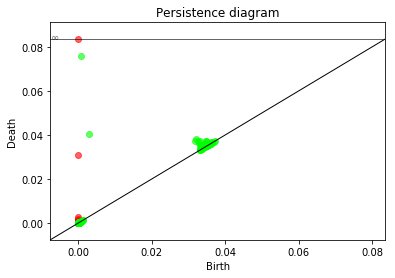

In [6]:
gd.plot_persistence_diagram(pers_alpha_W);

In [7]:
d_alpha_95,st_alpha,dist_boot_vec =  ps.bottleneck_bootstrap_data_points(data = W,
                                    filt = "Alpha",
                                    max_dimension=1,
                                    metric= gd.bottleneck_distance,
                                    output_dvec = True)

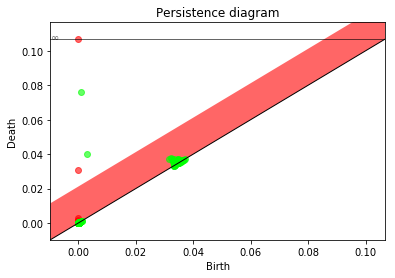

In [8]:
gd.plot_persistence_diagram(st_alpha,band = 2 *d_alpha_95 );

The object `dist_boot_vec` is the vector of boostrap bootlneck distances:

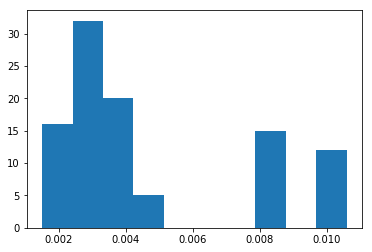

In [9]:
plt.hist(dist_boot_vec);

#### Application to the Rips -filtration in $\mathbb R ^p$

In [10]:
d_rips_95,st_out = ps.bottleneck_bootstrap_data_points(data = W,filt = "Rips",
                                    max_dimension=1,max_edge_length = 0.6,
                                    metric= gd.bottleneck_distance)

In [11]:
d_rips_95

0.12331727684758856

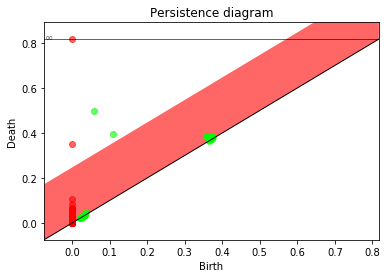

In [12]:
gd.plot_persistence_diagram(st_out,band = 2 *d_rips_95 );

In [15]:
from scipy.spatial import distance_matrix
dist_W = distance_matrix(W,W)

In [16]:
myquantile_dist,st_out_dist = ps.bottleneck_bootstrap_data_points(data = dist_W,filt = "Rips",
                                                        pairwise_dist=True,
                                                        max_dimension=1,
                                                        max_edge_length = 0.6,
                                                        metric= gd.bottleneck_distance)

In [17]:
myquantile_dist

0.12331727684758856

#### Application to the Rips-filtration with pairwise distances

We consider the Protein binding dataset provided by the paper of [Kovacev-Nikolic et.al](https://arxiv.org/pdf/1412.1394.pdf).

We compute the Vietoris-Rips filtration for a metric of dynamical distances, see this [notebook](Tuto-GUDHI-simplicial-complexes-from-distance-matrix.ipynb) for more details on the construction.

In [2]:
data = pd.read_csv("./datasets/Corr_ProteinBinding/1anf.corr_1.txt",
                   header=None,delim_whitespace=True)
mat_dist0 = 1- np.abs(data)
n,p = mat_dist0.shape
print(n)
mat_dist0

370


,0,1,2,3,4,5,6,7,8,9,...,360,361,362,363,364,365,366,367,368,369
0,0.000000,0.076200,0.171364,0.378207,0.461747,0.493499,0.478665,0.432338,0.568455,0.639504,...,0.694159,0.723059,0.660802,0.614051,0.660601,0.686334,0.640850,0.617944,0.695108,0.748451
1,0.076200,0.000000,0.122763,0.233837,0.350744,0.406213,0.425202,0.381799,0.541636,0.646580,...,0.817461,0.844610,0.781266,0.740222,0.793586,0.808770,0.754748,0.730646,0.804961,0.848953
2,0.171364,0.122763,0.000000,0.084642,0.131528,0.148980,0.162259,0.164105,0.333175,0.480605,...,0.782234,0.813481,0.718610,0.666239,0.742311,0.740322,0.667525,0.653546,0.742430,0.766030
3,0.378207,0.233837,0.084642,0.000000,0.045478,0.132107,0.217299,0.293902,0.494307,0.675635,...,0.913930,0.929677,0.853475,0.813717,0.868041,0.856491,0.797437,0.781044,0.842591,0.858435
4,0.461747,0.350744,0.131528,0.045478,0.000000,0.059280,0.146850,0.297257,0.511751,0.734412,...,0.967195,0.979578,0.889375,0.841519,0.895967,0.874522,0.804538,0.779865,0.841695,0.849836
5,0.493499,0.406213,0.148980,0.132107,0.059280,0.000000,0.036548,0.155409,0.345986,0.581903,...,0.962770,0.991234,0.876707,0.817526,0.901554,0.876637,0.784507,0.764810,0.847983,0.845652
6,0.478665,0.425202,0.162259,0.217299,0.146850,0.036548,0.000000,0.065396,0.190285,0.403237,...,0.892109,0.937152,0.811534,0.741457,0.844728,0.828395,0.725084,0.708232,0.810339,0.810207
7,0.432338,0.381799,0.164105,0.293902,0.297257,0.155409,0.065396,0.000000,0.055217,0.183052,...,0.789152,0.849026,0.727799,0.667878,0.794694,0.785266,0.684806,0.694667,0.810385,0.804075
8,0.568455,0.541636,0.333175,0.494307,0.511751,0.345986,0.190285,0.055217,0.000000,0.055160,...,0.725102,0.795771,0.684093,0.629630,0.763327,0.760684,0.668724,0.695173,0.811014,0.796648
9,0.639504,0.646580,0.480605,0.675635,0.734412,0.581903,0.403237,0.183052,0.055160,0.000000,...,0.638313,0.712197,0.629434,0.599150,0.730220,0.737995,0.673082,0.726602,0.831445,0.814286


We build the Vietoris-Rips complex from the distance matrix `mat_dist0`, see this [notebook](Tuto-GUDHI-simplicial-complexes-from-distance-matrix.ipynb) for more details.

In [3]:
skeleton_protein0 = gd.RipsComplex(distance_matrix=mat_dist0.values,
                                  max_edge_length=0.8) 

Rips_simplex_tree_protein0 = skeleton_protein0.create_simplex_tree(max_dimension=2)

Now we can compute persistence and plot the persistence diagram:

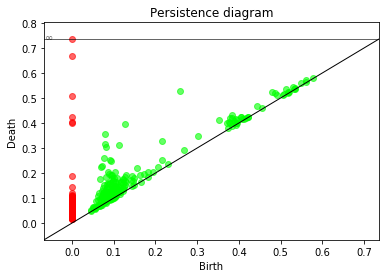

In [4]:
BarCodes_Rips0 = Rips_simplex_tree_protein0.persistence()
gd.plot_persistence_diagram(BarCodes_Rips0);

In [39]:
d_rips_95,st_out,d_boot = ps.bottleneck_bootstrap_data_points(data = mat_dist0.values,filt = "Rips",
                                                        pairwise_dist=True,
                                                        max_dimension=1,
                                                        max_edge_length = 0.8,
                                                        metric= gd.bottleneck_distance,
                                                        B=100,      
                                                        output_dvec= True)

In [40]:
d_rips_95

0.33434818

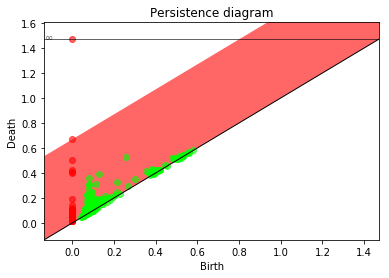

In [41]:
gd.plot_persistence_diagram(st_out,band = 2 *d_rips_95 );